# Time Evolution of the Simple Harmonic Oscillator

In [10]:
# Numpy
import numpy as np
from numpy.random import poisson

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

# Animations
from matplotlib import animation as anim
from IPython.display import HTML

# Function that gives Hermite polynomials
from scipy.special import eval_hermite as hermite

# A function for computing the magnitude squared of complex numbers
mag_squared = lambda a: (np.conj(a)*a).real

# Better plots in the notebook
%matplotlib notebook 

In [11]:
x = np.linspace(-15,15,1000) # An array of position values to use for plotting

# $ \psi(x,t) = \sum_{n=0}^\infty c_n(t=0) \exp(\frac{-iE_n t}{\hbar}) \phi_n(x,t=0)$

# $ E_n = \hbar \omega (n+1/2) $, let $\tau=\omega/2\pi$

# then

# $\psi(x,t) = \sum_{n=0}^\infty c_n(t = 0) \exp\left(\frac{-2\pi i(n+1/2)t}{\tau}\right) \phi_n(x,t=0)$


In [12]:
# Function to produce the nth energy eigenfunction
def psi_e(x,n):
    psi = hermite(n,x)*np.exp(-x**2/2) # Compute the un-normalized wavefunction for nth
    psi = psi/np.sqrt(np.sum(mag_squared(psi))) # Normalize it numerically
    
    return psi

In [13]:
def psi_t(x,t,cns):
    # cns is a dictionary {n->c_n} 
    
    psi = np.zeros(len(x))
    
    for n in cns:
        psi = psi + np.exp(-2j*np.pi*(n+1/2)*t)*cns[n]*psi_e(x,n)
        
    # Normalize
    psi = psi/np.sqrt(np.sum(mag_squared(psi)))
    
    return psi

## This is a dictionary of $c_n$ values in the form $n:c_n$. All other terms are zero

In [14]:
c = {
    30:1,
    31:1
}

In [15]:
psi = psi_t(x,0,c)

<IPython.core.display.Javascript object>


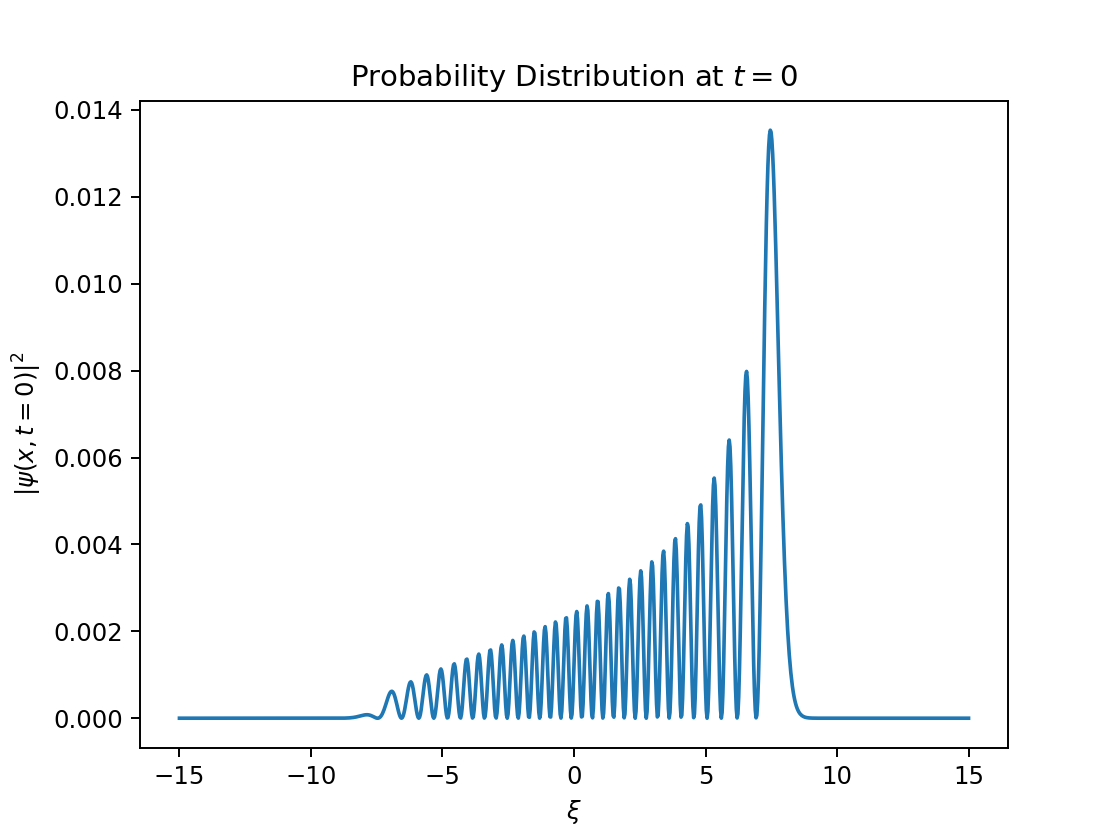

Text(0.5, 0, '$\\xi$')

In [16]:
f,ax = plt.subplots()
ax.plot(x,mag_squared(psi_t(x,0.0,c)));
ax.set_title(r'Probability Distribution at $t=0$')
ax.set_ylabel(r'$|\psi(x,t=0)|^2$')
ax.set_xlabel(r'$\xi$')

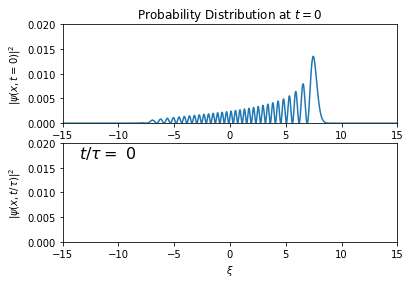

In [8]:
f2,ax2 = plt.subplots(2,1)
for ax in ax2:
    ax.set_xlim([-15,15])
    ax.set_ylim([0,0.02])

ax2[0].plot(x,mag_squared(psi_t(x,0,c)))
line, = ax2[1].plot([],[]);
ax2[0].set_title(r'Probability Distribution at $t=0$')
ax2[0].set_ylabel(r'$|\psi(x,t=0)|^2$')
ax2[1].set_ylabel(r'$|\psi(x,t/\tau)|^2$')

ax2[1].set_xlabel(r'$\xi$')

sup_t = ax2[1].text(0.05,0.9,r'$t/\tau = $ {}'.format(0),
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes,
        fontsize=16)

In [17]:
dt = 0.01

def init():
    line.set_data([],[])
    return (line,)

def animate(i,line):
    psi = psi_t(x,dt*i,c)
    line.set_data(x,mag_squared(psi))
    sup_t.set_text(r'$t/\tau = $ {0:.2f}'.format(dt*i))

    return (line,)

In [18]:
movie = anim.FuncAnimation(f2, lambda i: animate(i,line), init_func=init,
                               frames=100, interval=60, blit=True)

HTML(movie.to_html5_video())

# Coherent State Time Evolution

### The coherent state is the eigenstate of the lowering operator
## $\hat{a}|\alpha \rangle = \alpha |\alpha\rangle$

### which we found to be

## $|\alpha\rangle = e^{-\frac{1}{2}|\alpha^2|}\sum_{n=0}^\infty \frac{\alpha}{\sqrt(n!)}|n\rangle$

### where $\alpha$ is any complex value. his state has the property that

### $\langle \hat{N}\rangle = |\alpha|^2$
### $\langle (\Delta \hat{N})^2 \rangle =  |\alpha|^2$

In [19]:
def coherent_cns(alpha,nlims=[0,100]):
    
    def c(x):
        a = np.sqrt(float(np.math.factorial(x)))
        return (1/a)*np.exp(-mag_squared(alpha)/2)*alpha**x
    
    return {n:c(n) for n in range(nlims[0],nlims[1])}
    

<IPython.core.display.Javascript object>


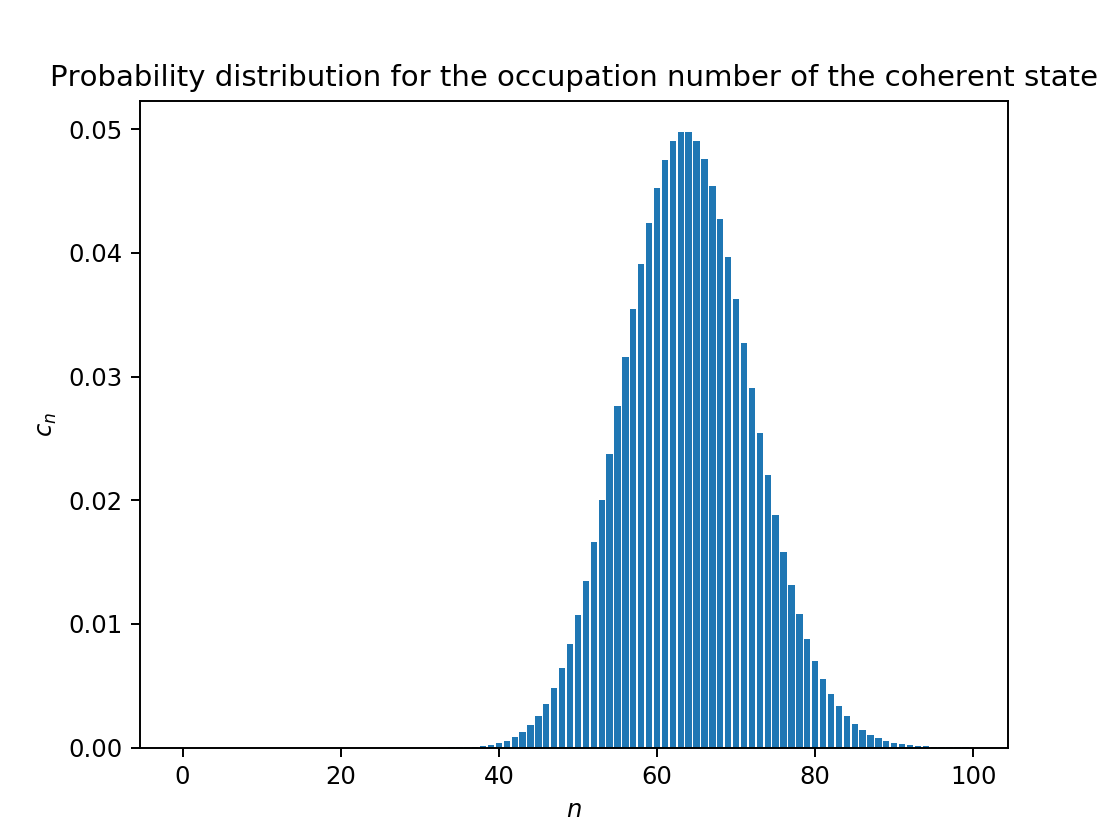

Text(0.5, 1.0, 'Probability distribution for the occupation number of the coherent state')

In [24]:
alpha = 8
mean_n = mag_squared(alpha)

coh = coherent_cns(alpha,[0,100])
f5,ax5 = plt.subplots()

cn_vals = mag_squared(np.array(list(coh.values())))
ax5.bar(list(coh.keys()),cn_vals,width=0.8)
ax5.text(0.85,2,r'$|\alpha|^2 =$ {:.2f}'.format(mean_n),
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
        fontsize=16);

ax5.set_ylabel(r'$c_n$')
ax5.set_xlabel(r'$n$')
ax5.set_title('Probability distribution for the occupation number of the coherent state')


<IPython.core.display.Javascript object>


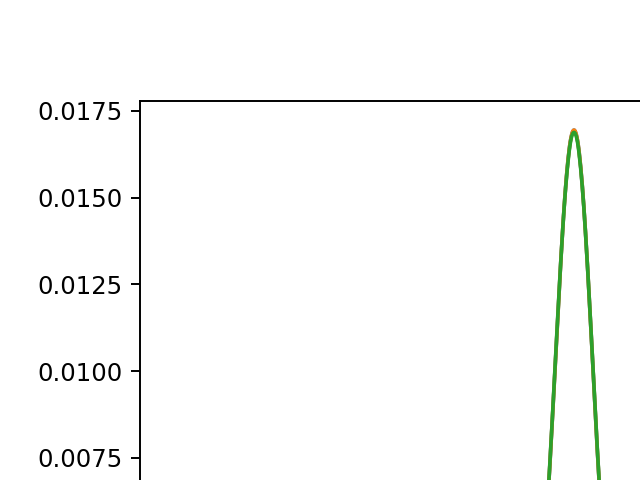

In [23]:
f6,ax6 = plt.subplots()
ax6.plot(x,mag_squared(psi_t(x,0,{0:1})),label='Ground State')
ax6.plot(x,mag_squared(psi_t(x,0,coh)),label='Coherent State at t=0')
line2, = ax6.plot(x,mag_squared(psi_t(x,0,coh)),label='Coherent State')
ax6.text(0.85,2,r'$|\alpha|^2 =$ {:.2f}'.format(mean_n),
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
        fontsize=16)

tt = ax6.text(0.05,2,r'$t/\tau = $ {}'.format(0),
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes,
        fontsize=16)

plt.legend(loc='lower left')

In [25]:
dt = 0.01

def init2():
    line2.set_data([],[])
    return (line2,)

def animate2(i):
    psi = psi_t(x,dt*i,coh)
    line2.set_data(x,mag_squared(psi))
    tt.set_text(r'$t/\tau = $ {0:.2f}'.format(dt*i))
    return (line2,)

In [26]:
movie2 = anim.FuncAnimation(f6, animate2, init_func=init,
                               frames=100, interval=60, blit=True)

HTML(movie2.to_html5_video())